In [1]:
import pandas as pd
import numpy as np

from utils.classification_report import plot_feature_importance, plot_confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import classification_report

In [2]:
# load data

df = pd.read_pickle('data/output/entities_processed_and_cleaned.pkl')

## Modelling

In [ ]:
# define X and y for the model

X = df.drop(columns=['surname_household'])
y = df['surname_household'].apply(
                                lambda x: 0 if pd.isna(x) else 1
                            )

In [ ]:
# split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# check the shape of the training and testing sets

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20059, 11), (5015, 11), (20059,), (5015,))

In [ ]:
# check the distribution of the target variable in the training and testing sets

y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)

(surname_household
 0    0.773269
 1    0.226731
 Name: proportion, dtype: float64,
 surname_household
 0    0.783051
 1    0.216949
 Name: proportion, dtype: float64)

In [ ]:
# define a pipeline for the Random Forest model

# define the preprocessing steps for the model
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# define the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

# fit the model on the training data

model.fit(X_train, y_train)

# make predictions on the testing data

y_pred = model.predict(X_test)

# evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3927
           1       0.99      0.99      0.99      1088

    accuracy                           0.99      5015
   macro avg       0.99      0.99      0.99      5015
weighted avg       0.99      0.99      0.99      5015



In [ ]:
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  Index(['age', 'birth_date'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['surname', 'firstname', 'occupation', 'civil_status', 'nationality',
       'link', 'lob', 'employer', 'observation'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier())])

In [ ]:
plot_confusion_matrix(model, y_pred=y_pred, y_test=y_test)

NameError: name 'plot_confusion_matrix' is not defined

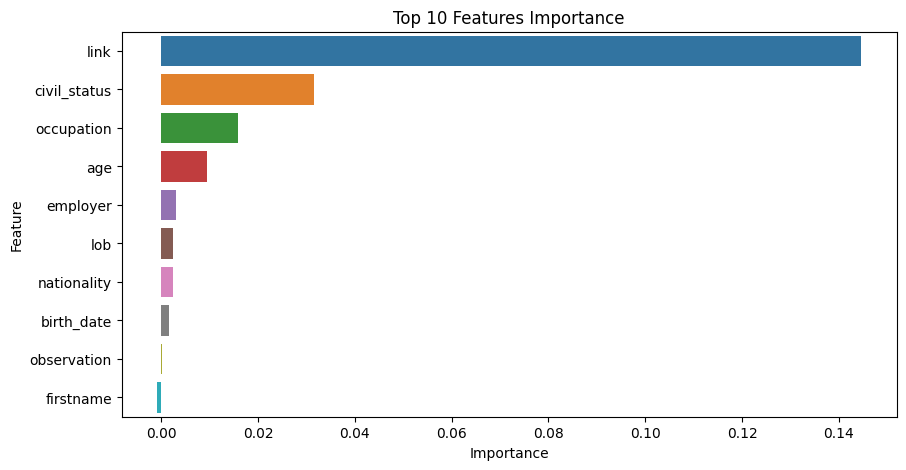

In [ ]:
plot_feature_importance(model, X_test, y_test)

In [ ]:
# now we make the same process but without the 'surname' column

X = df.drop(columns=['surname', 'surname_household'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# define the preprocessing steps for the model
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# define the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

# fit the model on the training data

model.fit(X_train, y_train)

# make predictions on the testing data

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      3927
           1       0.81      0.87      0.84      1088

    accuracy                           0.93      5015
   macro avg       0.89      0.91      0.90      5015
weighted avg       0.93      0.93      0.93      5015



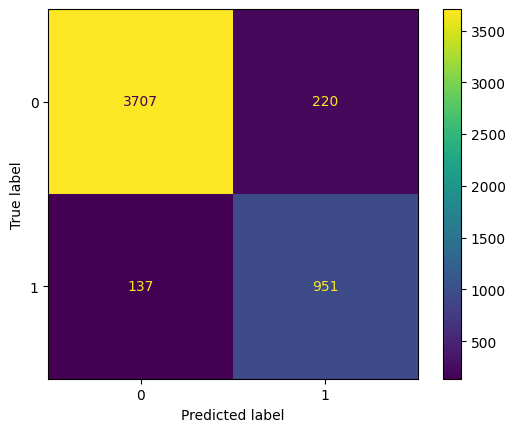

In [ ]:
# plot confusion matrix

plot_confusion_matrix(model, y_pred=y_pred, y_test=y_test)

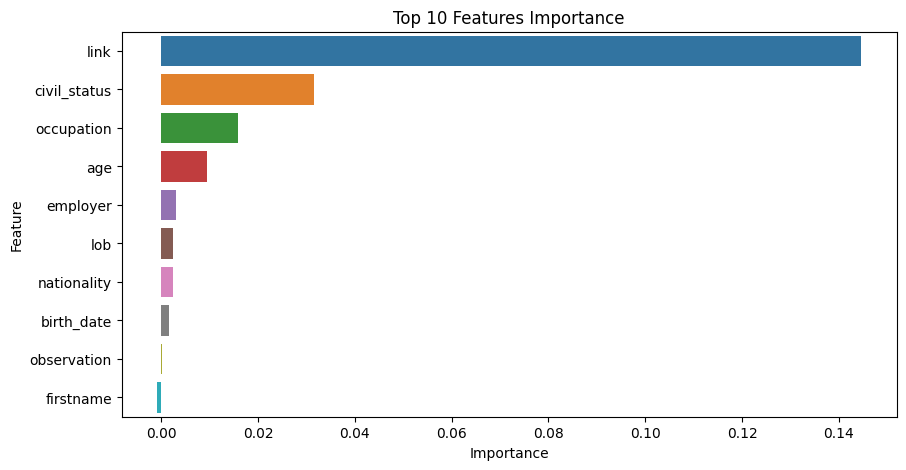

In [ ]:
# calculate the feature importance using permutation importance
plot_feature_importance(model, X_test, y_test)

## Hyperparameter tuning

In [ ]:
# use random search to find the best hyperparameters for the model

# define the hyperparameters grid
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_features': ['auto', 'sqrt', 'log2'],
    'classifier__max_depth': [10, 20, 30, 40, 50, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__bootstrap': [True, False]
}

# define the RandomizedSearchCV
search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

# fit the model on the training data
search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END classifier__bootstrap=False, classifier__max_depth=None, classifier__max_features=log2, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=200; total time=  24.3s
[CV] END classifier__bootstrap=False, classifier__max_depth=None, classifier__max_features=log2, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=200; total time=  25.0s
[CV] END classifier__bootstrap=False, classifier__max_depth=None, classifier__max_features=log2, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=200; total time=  22.8s
[CV] END classifier__bootstrap=False, classifier__max_depth=None, classifier__max_features=log2, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=200; total time=  23.3s
[CV] END classifier__bootstrap=True, classifier__max_depth=50, classifier__max_features=a

/home/codespace/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
190 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
104 fits failed with the following error:
Traceback (most recent call last):
  File "/home/codespace/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/home/codespace/.local/lib/python3.10/site-packages/sklearn/pipeline.py", line 475, in fit
    self._final_estimator.fit(Xt, y, **l

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer())]),
                                                                               Index(['age', 'birth_date'], dtype='object')),
                                                                              ('cat',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(fill_value='missing',
                                                                                                              strategy='constant')),
                                                                                               ('onehot',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               Index(['firs...
                                             ('classifier',
                                              RandomForestClassifier())]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'classifier__bootstrap': [True, False],
                                        'classifier__max_depth': [10, 20, 30,
                                                                  40, 50,
                                                                  None],
                                        'classifier__max_features': ['auto',
                                                                     'sqrt',
                                                                     'log2'],
                                        'classifier__min_samples_leaf': [1, 2,
                                                                         4],
                                        'classifier__min_samples_split': [2, 5,
                                                                          10],
                                        'classifier__n_estimators': [100, 200]},
                   random_state=42, verbose=2)

In [ ]:
# get the best hyperparameters

search.best_params_

{'classifier__n_estimators': 100,
 'classifier__min_samples_split': 10,
 'classifier__min_samples_leaf': 1,
 'classifier__max_features': 'sqrt',
 'classifier__max_depth': None,
 'classifier__bootstrap': False}

In [ ]:
# make predictions on the testing data using the best model

y_pred = search.predict(X_test)

# evaluate the model

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      3927
           1       0.82      0.89      0.85      1088

    accuracy                           0.93      5015
   macro avg       0.89      0.92      0.91      5015
weighted avg       0.94      0.93      0.93      5015



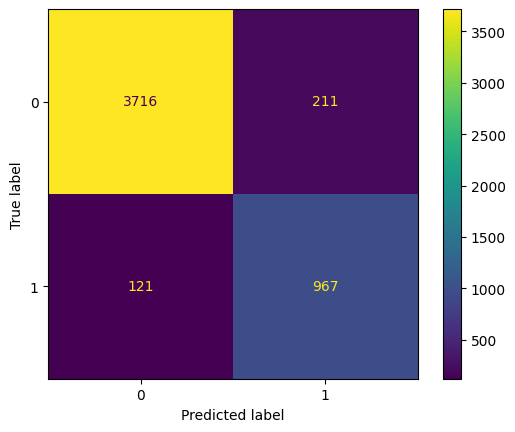

In [ ]:
# plot confusion matrix

plot_confusion_matrix(search, y_pred=y_pred, y_test=y_test)

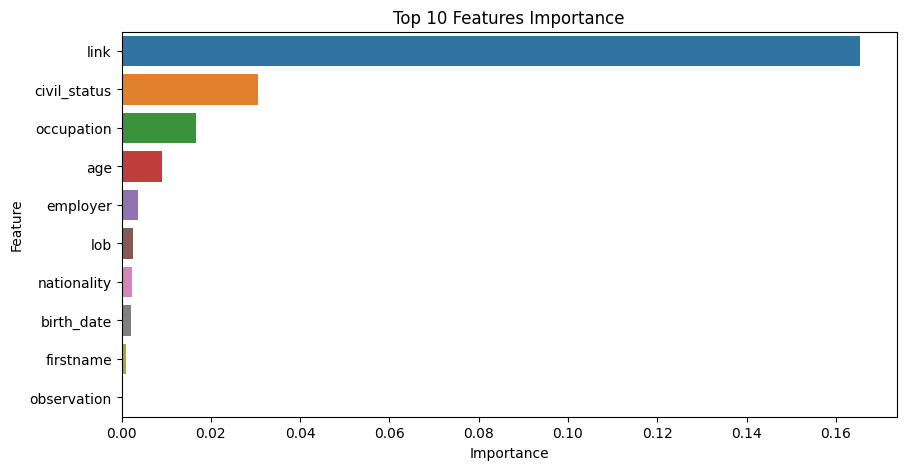

In [ ]:
# calculate the feature importance

plot_feature_importance(search, X_test, y_test)
